### 1. Датасет: Диабет у индейцев Пима
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
##### О наборе данных: 
Этот набор данных был получен из Национального института диабета, болезней органов пищеварения и почек. Цель набора данных - диагностически предсказать, есть ли у пациента сахарный диабет, на основе определенных диагностических измерений, включенных в набор данных. На выбор этих образцов из более обширной базы данных было наложено несколько ограничений. В частности, все пациенты были женщинами в возрасте не менее 21 года, родом из племени пима.
##### Таким образом:
* Объект наблюдения - женщины племени пима, возрастом от 21 года.
* Атрибуты: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.
* Проблемная область: Предсказание диабета у пациента на основе измерений.

In [347]:
import pandas as pd
df = pd.read_csv(".//static//csv//diabetes.csv", sep=",")
print('Количество колонок: ' + str(df.columns.size))  
print('Колонки: ' + ', '.join(df.columns)+'\n')

df.info()
df.head()

Количество колонок: 9
Колонки: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Получение сведений о пропущенных данных
Типы пропущенных данных:

- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [348]:
# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    print(f"{i} процент пустых значений: %{null_rate:.2f}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Pregnancies процент пустых значений: %0.00
Glucose процент пустых значений: %0.00
BloodPressure процент пустых значений: %0.00
SkinThickness процент пустых значений: %0.00
Insulin процент пустых значений: %0.00
BMI процент пустых значений: %0.00
DiabetesPedigreeFunction процент пустых значений: %0.00
Age процент пустых значений: %0.00
Outcome процент пустых значений: %0.00


##### Проверим выбросы и устраним их:

In [349]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

Колонка Pregnancies:
  Есть выбросы: Да
  Количество выбросов: 4
  Минимальное значение: 0.0
  Максимальное значение: 13.5
  1-й квартиль (Q1): 1.0
  3-й квартиль (Q3): 6.0

Колонка Glucose:
  Есть выбросы: Да
  Количество выбросов: 5
  Минимальное значение: 37.125
  Максимальное значение: 199.0
  1-й квартиль (Q1): 99.0
  3-й квартиль (Q3): 140.25

Колонка BloodPressure:
  Есть выбросы: Да
  Количество выбросов: 45
  Минимальное значение: 35.0
  Максимальное значение: 107.0
  1-й квартиль (Q1): 62.0
  3-й квартиль (Q3): 80.0

Колонка SkinThickness:
  Есть выбросы: Да
  Количество выбросов: 1
  Минимальное значение: 0.0
  Максимальное значение: 80.0
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 32.0

Колонка Insulin:
  Есть выбросы: Да
  Количество выбросов: 34
  Минимальное значение: 0.0
  Максимальное значение: 318.125
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 127.25

Колонка BMI:
  Есть выбросы: Да
  Количество выбросов: 19
  Минимальное значение: 13.35
  Максимальное значение: 

#### Постараемся выявить зависимости Outcome от остальных колонок:

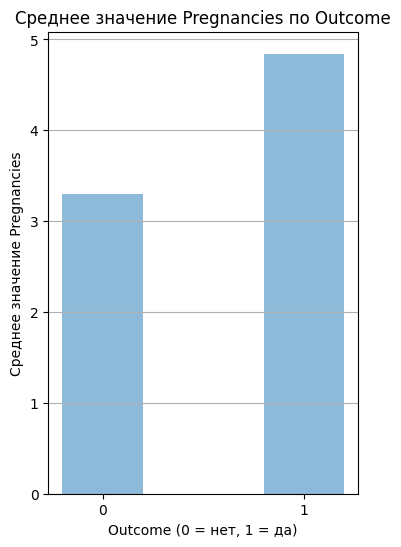

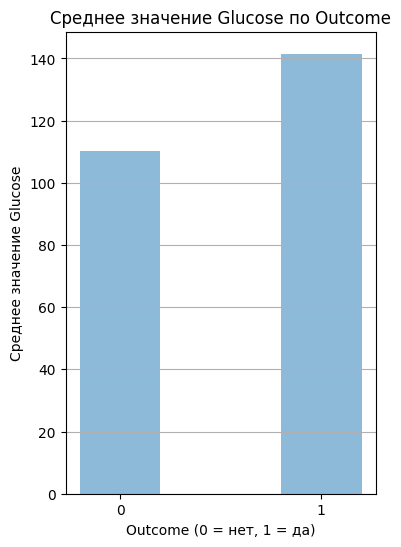

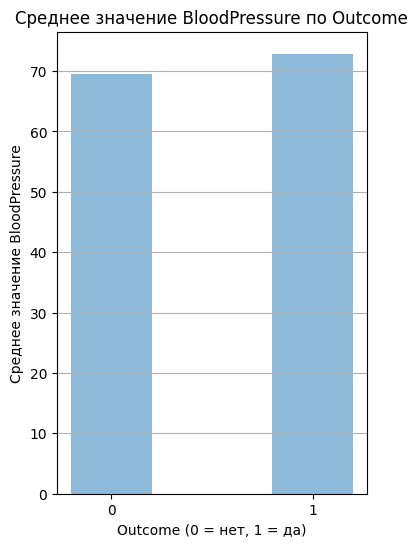

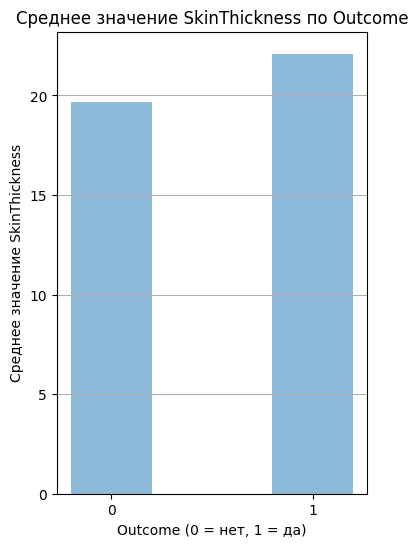

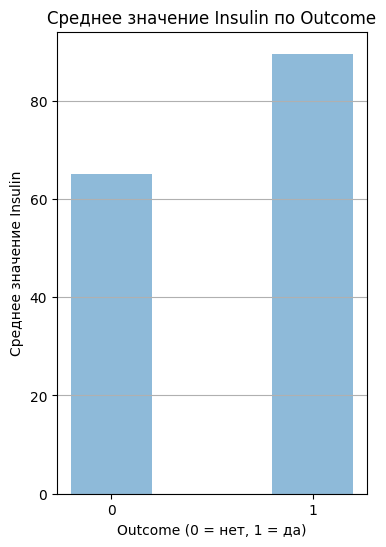

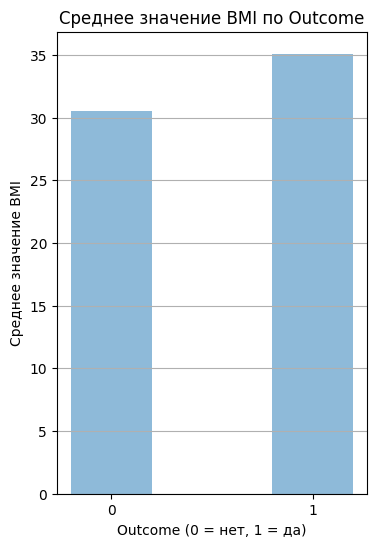

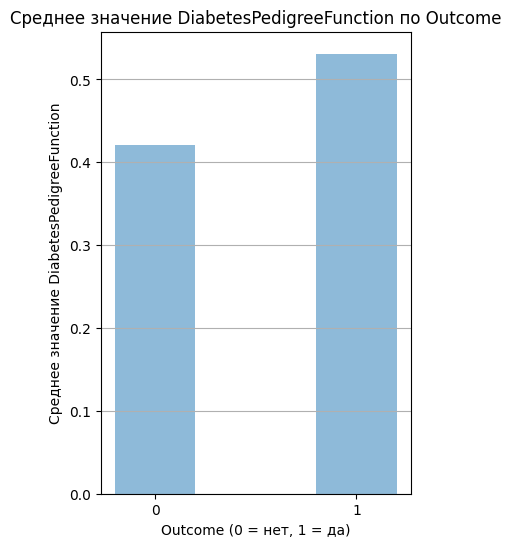

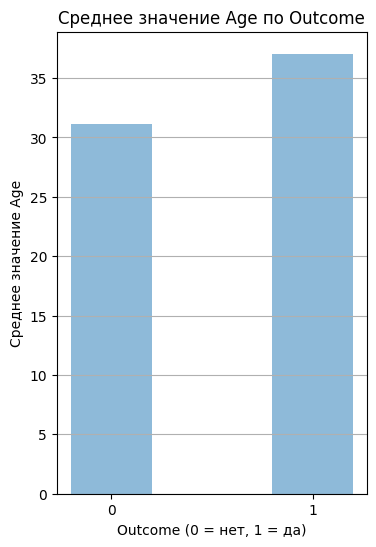

In [350]:
import matplotlib.pyplot as plt
# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            counts = df[column].value_counts() 
            counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            grouped_data = df.groupby('Outcome')[column].mean()

            # Создаем столбчатую диаграмму
            plt.bar(grouped_data.index, grouped_data.values, alpha=0.5, width=0.4)
            plt.title(f'Среднее значение {column} по Outcome')
            plt.xlabel('Outcome (0 = нет, 1 = да)')
            plt.ylabel(f'Среднее значение {column}')
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid(axis='y')
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show()  # Отображение графика

#### Разобьем наш набор на выборки относительно параметра Outcome:

In [351]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # содержит все столбцы
    y = df_input[
        [stratify_colname]
    ]  # датафрейм с колонкой, относительно которой разбиваем

    # Разделяем датафрейм на обучающую выборку и временную
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # разделяем временную на тестовую и контрольную
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    # проверяем, что в сумме все три выборки дают то же количество значений, что и было в изначальной выборке
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

Outcome
0    500
1    268
Name: count, dtype: int64

Обучающая выборка:  (460, 9)
Outcome
0    299
1    161
Name: count, dtype: int64


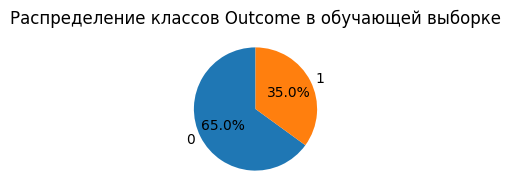

Контрольная выборка:  (154, 9)
Outcome
0    101
1     53
Name: count, dtype: int64


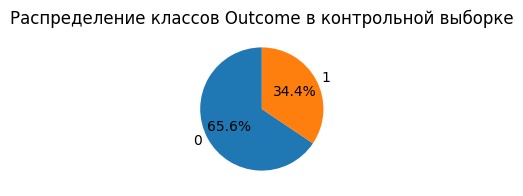

Тестовая выборка:  (154, 9)
Outcome
0    100
1     54
Name: count, dtype: int64


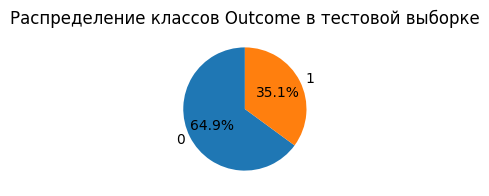

In [352]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.Outcome.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="Outcome", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.Outcome.value_counts())
counts = df_train['Outcome'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов Outcome в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.Outcome.value_counts())
counts = df_val['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.Outcome.value_counts())
counts = df_test['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тестовой выборке')
plt.show()

#### Сбалансируем распределение:

1. Балансировка данных оверсемплингом. Это метод, увеличивающий число наблюдений в меньшинственном классе для достижения более равномерного распределения классов.

Обучающая выборка:  (460, 9)
Outcome
0    299
1    161
Name: count, dtype: int64
Обучающая выборка после oversampling:  (587, 9)
Outcome
0    299
1    288
Name: count, dtype: int64


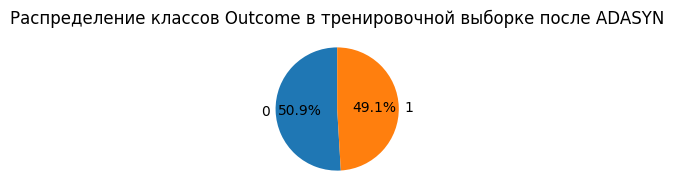

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0       1.000000   73.000000      50.000000      10.000000    0.000000   
1       1.000000   84.000000      64.000000      23.000000  115.000000   
2       8.000000  133.000000      72.000000       0.000000    0.000000   
3       3.000000  106.000000      72.000000       0.000000    0.000000   
4       5.000000   88.000000      78.000000      30.000000    0.000000   
..           ...         ...            ...            ...         ...   
582     2.629250  113.651700      62.696600      36.303400    0.000000   
583     6.450045  106.641614      60.366637      25.008251    0.000000   
584     8.753291  118.116773      35.000000       0.000000    0.000000   
585     8.411659  160.786384      72.609702      40.652426  278.176681   
586     4.948382  130.526964      82.314330      36.788906  110.000000   

           BMI  DiabetesPedigreeFunction        Age  Outcome  
0    23.000000                  0.248000  21.000000        0  
1    36.900000                  0.471000  28.000000        0  
2    32.900000                  0.270000  39.000000        1  
3    25.800000                  0.207000  27.000000        0  
4    27.600000                  0.258000  37.000000        0  
..         ...                       ...        ...      ...  
582  33.632585                  0.445897  27.191151        1  
583  27.150780                  0.318640  28.266727        1  
584  23.728855                  0.212378  34.986837        1  
585  41.212817                  0.891405  32.780595        1  
586  36.689522                  0.771453  38.895223        1  

[587 rows x 9 columns]

In [353]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()

print("Обучающая выборка: ", df_train.shape)
print(df_train.Outcome.value_counts())

X_resampled, y_resampled = ada.fit_resample(df_train, df_train["Outcome"])
df_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn.Outcome.value_counts())

counts = df_train_adasyn['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировочной выборке после ADASYN')
plt.show()

df_train_adasyn

2. Балансировка данных андерсемплингом. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (322, 9)
Outcome
0    161
1    161
Name: count, dtype: int64


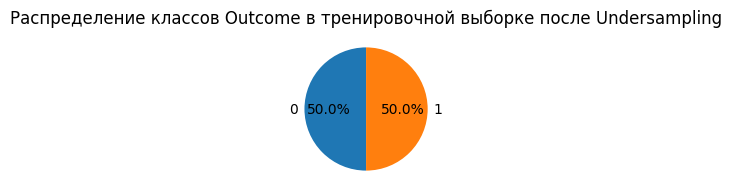

In [354]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['Outcome']), df_train['Outcome'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['Outcome'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировочной выборке после Undersampling')
plt.show()

### 2. Датасет: Данные по инсультам
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
##### О наборе данных: 
По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй по значимости причиной смертности во всем мире, на его долю приходится примерно 11% от общего числа смертей.
Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курильщика. Каждая строка в данных содержит соответствующую информацию о пациенте.

Атрибуты:
1) id: уникальный идентификатор
2) gender: "Male", "Female" или "Other"
3) age: возраст пациента
4) hypertension: 0, если у пациента нет артериальной гипертензии, 1, если у пациента есть артериальная гипертензия
5) heart_disease: 0, если у пациента нет сердечных заболеваний, 1, если у пациента есть сердечные заболевания
6) ever_married: "No" или "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: средний уровень глюкозы в крови
10) bmi: индекс массы тела
11) smoking_status: "formerly smoked", "never smoked", "smokes" или "Unknown"*
12) stroke: 1, если у пациента был инсульт, или 0, если нет.
##### Таким образом:
* Объект наблюдения - Реальные пациенты.
* Атрибуты: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke.
* Проблемная область: Прогнозирование вероятности инсульта у пациента.

In [355]:
import pandas as pd
df = pd.read_csv(".//static//csv//stroke.csv", sep=",")
print('Количество колонок: ' + str(df.columns.size))  
print('Колонки: ' + ', '.join(df.columns)+'\n')

df.info()
df.head()

Количество колонок: 12
Колонки: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

#### Получение сведений о пропущенных данных
Типы пропущенных данных:

- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [356]:
# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

id процент пустых значений: %0.00
gender процент пустых значений: %0.00
age процент пустых значений: %0.00
hypertension процент пустых значений: %0.00
heart_disease процент пустых значений: %0.00
ever_married процент пустых значений: %0.00
work_type процент пустых значений: %0.00
Residence_type процент пустых значений: %0.00
avg_glucose_level проц

##### Пропущенные данные существуют. Необходимо заполнить пропуски медианными значениями.


Заполнение пропущенных данных:

In [357]:
fillna_df = df.fillna(0)

print(fillna_df.shape)

print(fillna_df.isnull().any())

# Замена пустых данных на 0
df["bmi"] = df["bmi"].fillna(0)

# Вычисляем медиану для колонки "bmi"
median_bmi = df["bmi"].median()

# Заменяем значения 0 на медиану
df.loc[df["bmi"] == 0, "bmi"] = median_bmi

df.tail()

(5110, 12)
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75  27.7     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

Удалим наблюдения с пропусками:

In [358]:
dropna_df = df.dropna()

print(dropna_df.shape)

print(fillna_df.isnull().any())
df.tail()

(5110, 12)
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75  27.7     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

##### Проверим выбросы и усредним их:

In [359]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


Колонка age:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 0.08
  Максимальное значение: 82.0
  1-й квартиль (Q1): 25.0
  3-й квартиль (Q3): 61.0

Колонка avg_glucose_level:
  Есть выбросы: Да
  Количество выбросов: 627
  Минимальное значение: 55.12
  Максимальное значение: 271.74
  1-й квартиль (Q1): 77.245
  3-й квартиль (Q3): 114.09

Колонка bmi:
  Есть выбросы: Да
  Количество выбросов: 126
  Минимальное значение: 10.3
  Максимальное значение: 97.6
  1-й квартиль (Q1): 23.8
  3-й квартиль (Q3): 32.8



#### Постараемся выявить зависимости Stroke от остальных колонок:

#### Разобьем наш набор на выборки относительно параметра Stroke:

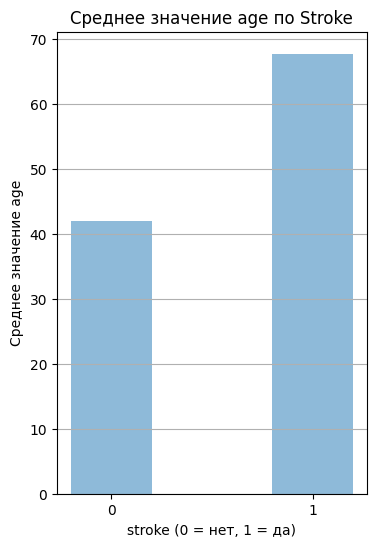

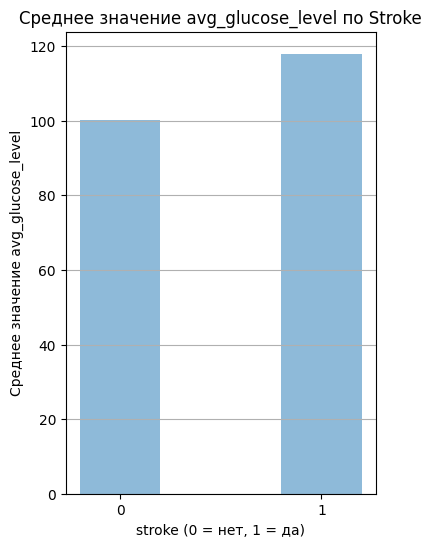

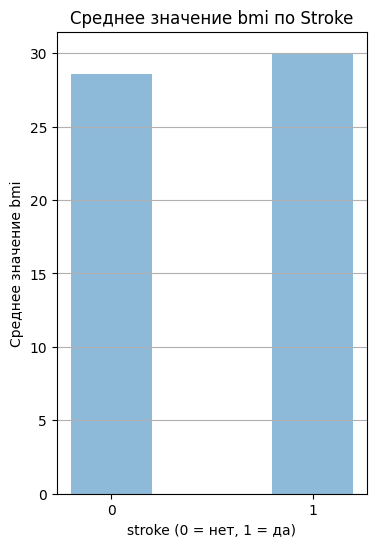

In [360]:
import matplotlib.pyplot as plt
# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            counts = df[column].value_counts() 
            counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            grouped_data = df.groupby('stroke')[column].mean()

            # Создаем столбчатую диаграмму
            plt.bar(grouped_data.index, grouped_data.values, alpha=0.5, width=0.4)
            plt.title(f'Среднее значение {column} по Stroke')
            plt.xlabel('stroke (0 = нет, 1 = да)')
            plt.ylabel(f'Среднее значение {column}')
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid(axis='y')
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show() 

In [361]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

stroke
0    4861
1     249
Name: count, dtype: int64

Обучающая выборка:  (3066, 12)
stroke
0    2917
1     149
Name: count, dtype: int64


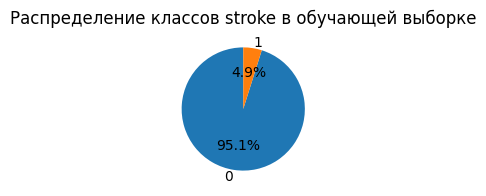

Контрольная выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


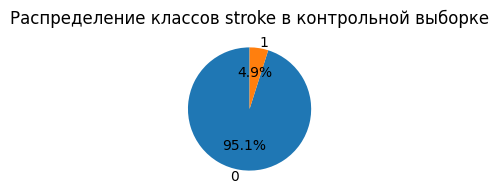

Тестовая выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


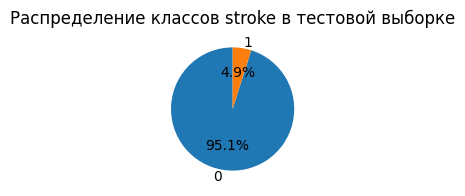

In [362]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.stroke.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="stroke", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.stroke.value_counts())
counts = df_train['stroke'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов stroke в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.stroke.value_counts())
counts = df_val['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.stroke.value_counts())
counts = df_test['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в тестовой выборке')
plt.show()

#### Сбалансируем распределение:

1. Балансировка данных оверсемплингом. Это метод, увеличивающий число наблюдений в меньшинственном классе для достижения более равномерного распределения классов.

Обучающая выборка после oversampling:  (5865, 17)
stroke
1    2948
0    2917
Name: count, dtype: int64


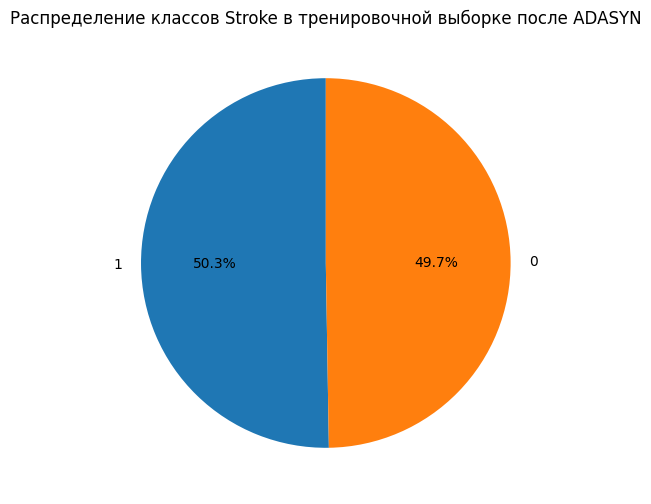

In [363]:
from imblearn.over_sampling import ADASYN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']  # Ваши категориальные признаки
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']  # Ваши числовые признаки

# Создание пайплайна для обработки категориальных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder для категориальных данных
        ('num', 'passthrough', numeric_features)  # Оставляем числовые колонки без изменений
    ]
)

# Создание экземпляра ADASYN
ada = ADASYN()

# Преобразование данных с помощью пайплайна
X = preprocessor.fit_transform(df_train.drop(columns=['stroke']))
y = df_train['stroke']

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(X, y)

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
# Восстанавливаем названия столбцов для DataFrame
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_column_names = list(ohe_columns) + numeric_features
df_train_adasyn.columns = new_column_names

# Добавление целевой переменной
df_train_adasyn['stroke'] = y_resampled

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['stroke'].value_counts())

# Визуализация
counts = df_train_adasyn['stroke'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Stroke в тренировочной выборке после ADASYN')
plt.show()

2. Балансировка данных андерсемплингом. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (298, 12)
stroke
0    149
1    149
Name: count, dtype: int64


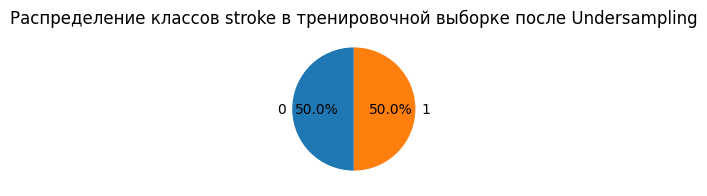

In [364]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['stroke']), df_train['stroke'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['stroke'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['stroke'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в тренировочной выборке после Undersampling')
plt.show()

### 3. Датасет: Набор данных для анализа и прогнозирования сердечного приступа
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
##### О наборе данных: 
По данным CDC, болезни сердца являются основной причиной смерти представителей большинства рас в США (афроамериканцев, американских индейцев и коренных жителей Аляски, а также белых). Около половины всех американцев (47%) имеют по крайней мере 1 из 3 основных факторов риска сердечно-сосудистых заболеваний: высокое кровяное давление, высокий уровень холестерина и курение. Другие ключевые показатели включают сахарный диабет, ожирение (высокий ИМТ), недостаточную физическую активность или чрезмерное употребление алкоголя. Выявление и профилактика факторов, оказывающих наибольшее влияние на сердечно-сосудистые заболевания, очень важны в здравоохранении. В свою очередь, достижения в области вычислительной техники позволяют применять методы машинного обучения для выявления "закономерностей" в данных, которые позволяют предсказать состояние пациента.

##### Таким образом:
* Объект наблюдения - представители большинства рас в США
* Атрибуты: HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth(как много дней за месяц вы чувствовали себя плохо), MentalHealth(как много дней за месяц вы чувствовали себя ментально плохо), DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer.
* Проблемная область: прогнозирование сердечного приступа у человека.

In [365]:
import pandas as pd
df = pd.read_csv(".//static//csv//heart.csv", sep=",")
print('Количество колонок: ' + str(df.columns.size))  
print('Колонки: ' + ', '.join(df.columns)+'\n')

df.info()
df.head()

Количество колонок: 18
Колонки: HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          31979

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

#### Получение сведений о пропущенных данных
Типы пропущенных данных:

- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [366]:
# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    print(f"{i} процент пустых значений: %{null_rate:.2f}")

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

HeartDisease процент пустых значений: %0.00
BMI процент пустых значений: %0.00
Smoking процент пустых значени

##### Пропущенные данные отсутствуют.


##### Проверим выбросы и усредним их:

In [367]:
numeric_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


Колонка BMI:
  Есть выбросы: Да
  Количество выбросов: 10396
  Минимальное значение: 12.02
  Максимальное значение: 94.85
  1-й квартиль (Q1): 24.03
  3-й квартиль (Q3): 31.42

Колонка PhysicalHealth:
  Есть выбросы: Да
  Количество выбросов: 47146
  Минимальное значение: 0.0
  Максимальное значение: 30.0
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 2.0

Колонка MentalHealth:
  Есть выбросы: Да
  Количество выбросов: 51576
  Минимальное значение: 0.0
  Максимальное значение: 30.0
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 3.0

Колонка SleepTime:
  Есть выбросы: Да
  Количество выбросов: 4543
  Минимальное значение: 1.0
  Максимальное значение: 24.0
  1-й квартиль (Q1): 6.0
  3-й квартиль (Q3): 8.0



#### Постараемся выявить зависимости HeartDisease от остальных колонок:

#### Разобьем наш набор на выборки относительно параметра HeartDisease:

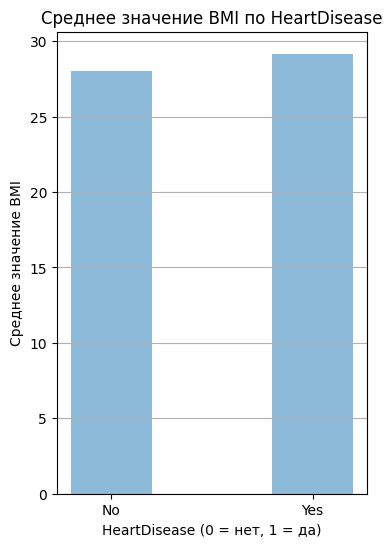

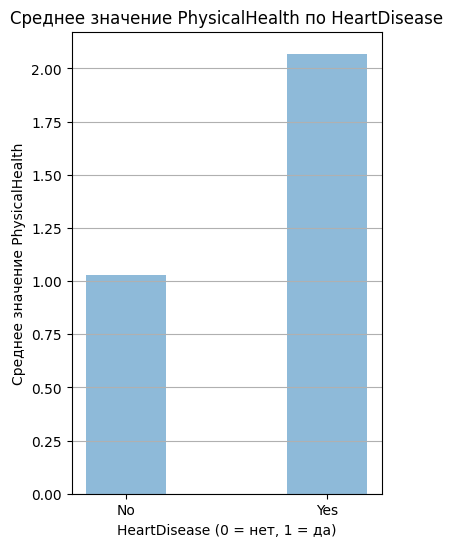

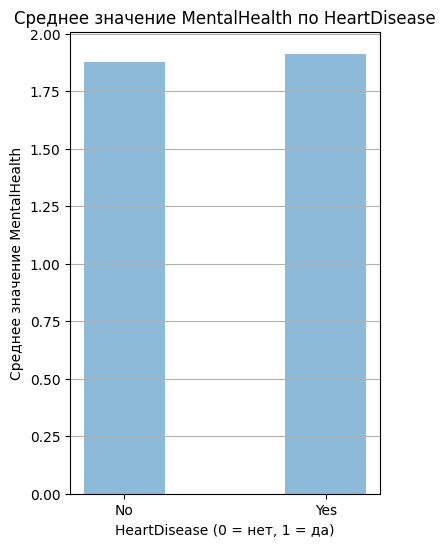

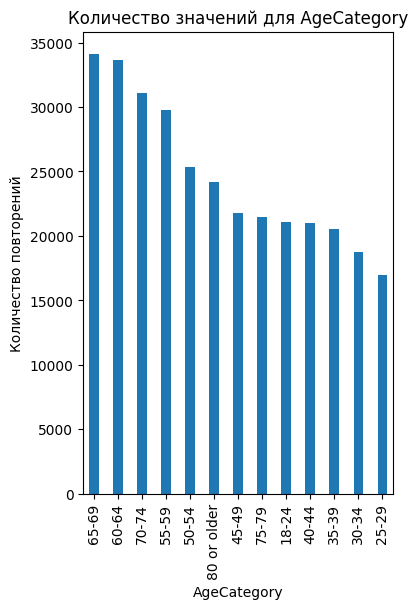

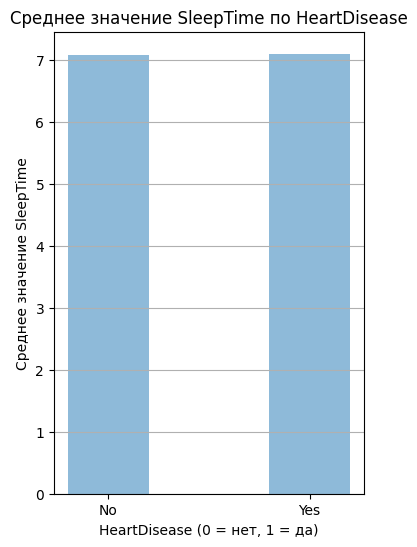

In [368]:
import matplotlib.pyplot as plt
# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            counts = df[column].value_counts() 
            counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            grouped_data = df.groupby('HeartDisease')[column].mean()

            # Создаем столбчатую диаграмму
            plt.bar(grouped_data.index, grouped_data.values, alpha=0.5, width=0.4)
            plt.title(f'Среднее значение {column} по HeartDisease')
            plt.xlabel('HeartDisease (0 = нет, 1 = да)')
            plt.ylabel(f'Среднее значение {column}')
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid(axis='y')
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar', width=0.4)  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show() 

In [369]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Обучающая выборка:  (191877, 18)
HeartDisease
No     175453
Yes     16424
Name: count, dtype: int64


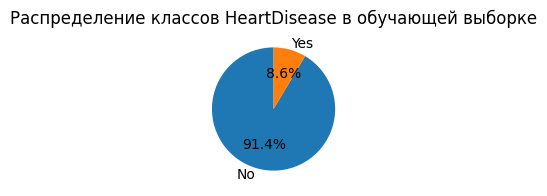

Контрольная выборка:  (63959, 18)
HeartDisease
No     58485
Yes     5474
Name: count, dtype: int64


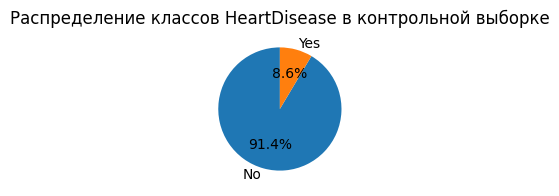

Тестовая выборка:  (63959, 18)
HeartDisease
No     58484
Yes     5475
Name: count, dtype: int64


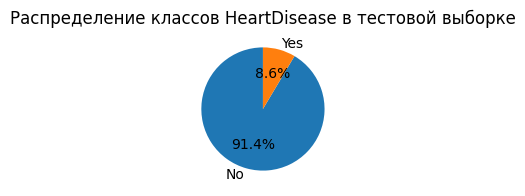

In [370]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.HeartDisease.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="HeartDisease", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.HeartDisease.value_counts())
counts = df_train['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов HeartDisease в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.HeartDisease.value_counts())
counts = df_val['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.HeartDisease.value_counts())
counts = df_test['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тестовой выборке')
plt.show()

#### Сбалансируем распределение:

1. Балансировка данных оверсемплингом. Это метод, увеличивающий число наблюдений в меньшинственном классе для достижения более равномерного распределения классов.

Обучающая выборка после oversampling:  (352020, 51)
HeartDisease
Yes    176567
No     175453
Name: count, dtype: int64


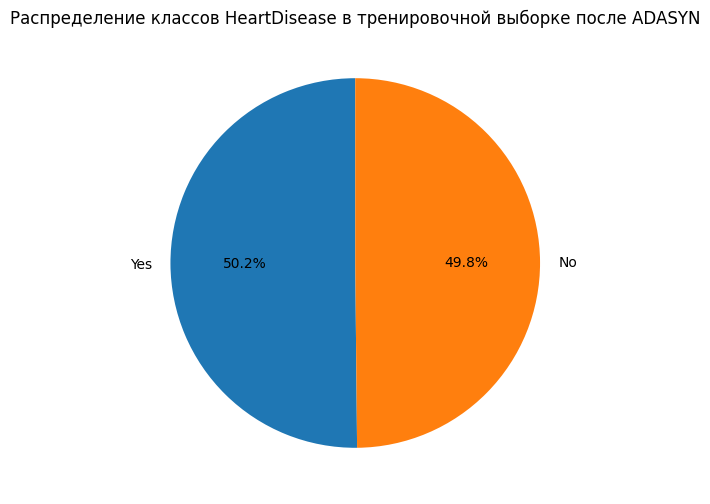

In [371]:
from imblearn.over_sampling import ADASYN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']  # Ваши категориальные признаки
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  # Ваши числовые признаки

# Создание пайплайна для обработки категориальных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder для категориальных данных
        ('num', 'passthrough', numeric_features)  # Оставляем числовые колонки без изменений
    ]
)

# Создание экземпляра ADASYN
ada = ADASYN()

# Преобразование данных с помощью пайплайна
X = preprocessor.fit_transform(df_train.drop(columns=['HeartDisease']))
y = df_train['HeartDisease']

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(X, y)

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
# Восстанавливаем названия столбцов для DataFrame
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_column_names = list(ohe_columns) + numeric_features
df_train_adasyn.columns = new_column_names

# Добавление целевой переменной
df_train_adasyn['HeartDisease'] = y_resampled

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['HeartDisease'].value_counts())

# Визуализация
counts = df_train_adasyn['HeartDisease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тренировочной выборке после ADASYN')
plt.show()

2. Балансировка данных андерсемплингом. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (32848, 18)
HeartDisease
No     16424
Yes    16424
Name: count, dtype: int64


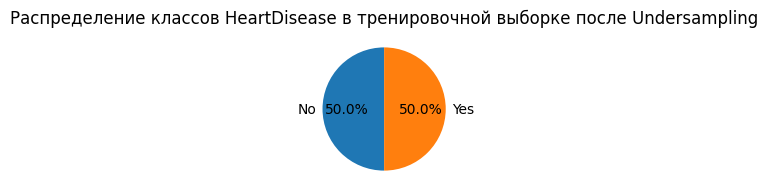

In [372]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['HeartDisease']), df_train['HeartDisease'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['HeartDisease'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['HeartDisease'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тренировочной выборке после Undersampling')
plt.show()